In [1]:
from funcs import *
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [2]:
x1, x2 = 0, np.pi
y0 = np.array([
    np.pi / 25,
    np.pi / 20
])
yr = real_y(x1, y0, x2)
print(f'Истинное значение: {yr}')

Истинное значение: [0.14901841 0.1397924 ]


### Решение с постоянным и автоматическим шагом

In [ ]:
value, *_ = call(diffur, x1, y0, x2, method='rk2', stepsetting='adaptive', eps=10 ** -4)

print(f'Решение СОДУ: {value}')
print(f'Истинная погрешность: { yr - value}')


print('---')


value, *_ = call(diffur, x1, y0, x2, method='rk4', stepsetting='adaptive', eps=10 ** -4)
print(f'Решение СОДУ: {value}')
print(f'Истинная погрешность: {yr - value}')


Решение СОДУ: [0.14902521 0.139787  ]
Истинная погрешность: [-6.79981012e-06  5.39953653e-06]
---
Решение СОДУ: [0.14901841 0.1397924 ]
Истинная погрешность: [ 3.48193874e-09 -2.62759811e-09]


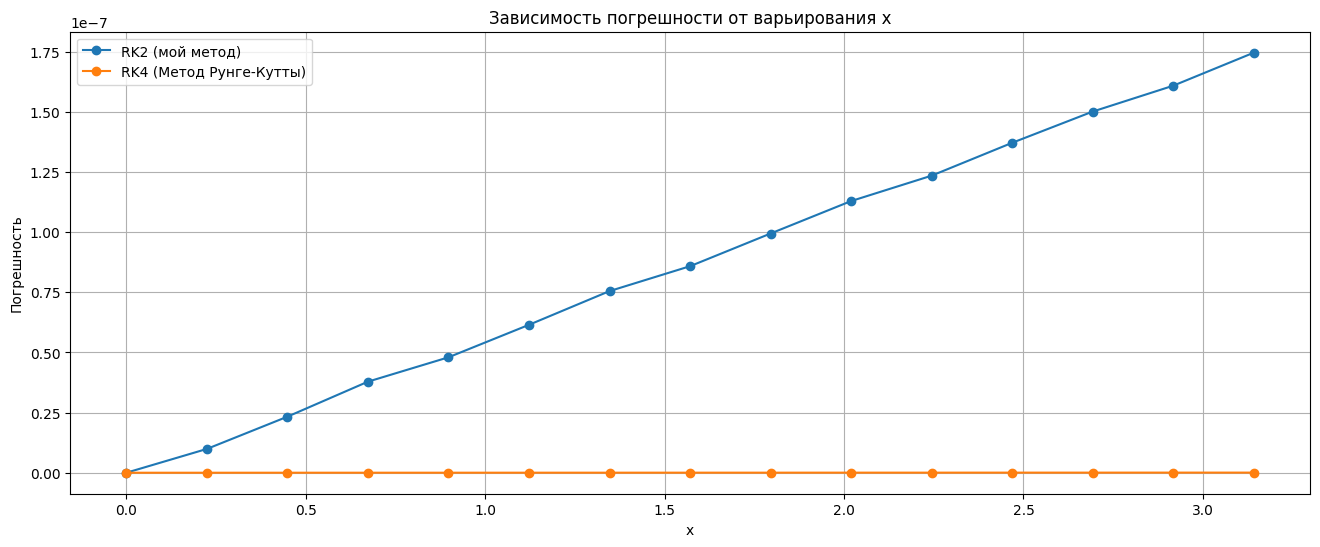

In [ ]:
plt.figure(figsize=(16, 6))
plt.title('Зависимость погрешности от варьирования x')

n_part = 100
comp_n_part = 15  # Длина сжатого списка

args = np.linspace(x1, x2, n_part)
comp_args = np.linspace(x1, x2, comp_n_part)

# Погрешность метода RK2 (ваш вариант)
mv_result = call(diffur, x1, y0, x2, method='rk2', stepsetting='const', eps=10**-4)
mv_step = mv_result[2]  #  шаг 

mv_errors = []
for x in args:
    numerical_sol = call(diffur, x1, y0, x, step=mv_step, method='rk2', stepsetting='none')[0]
    exact_sol = real_y(x1, y0, x)
    mv_errors.append(norm(numerical_sol - exact_sol))

# Погрешность метода RK4
rk_result = call(diffur, x1, y0, x2, method='rk4', stepsetting='const', eps=10**-4)
rk_step = rk_result[2]  # Получаем шаг 

rk_errors = []
for x in args:
    numerical_sol = call(diffur, x1, y0, x, step=rk_step, method='rk4', stepsetting='none')[0]
    exact_sol = real_y(x1, y0, x)
    rk_errors.append(norm(numerical_sol - exact_sol))

# Строим графики
plt.plot(args, mv_errors, marker='o', label="RK2 (мой метод)")
plt.plot(args, rk_errors, marker='o', label="RK4 (Метод Рунге-Кутты)")

plt.xlabel('x')
plt.ylabel('Погрешность')
plt.grid()
plt.legend()
plt.show()

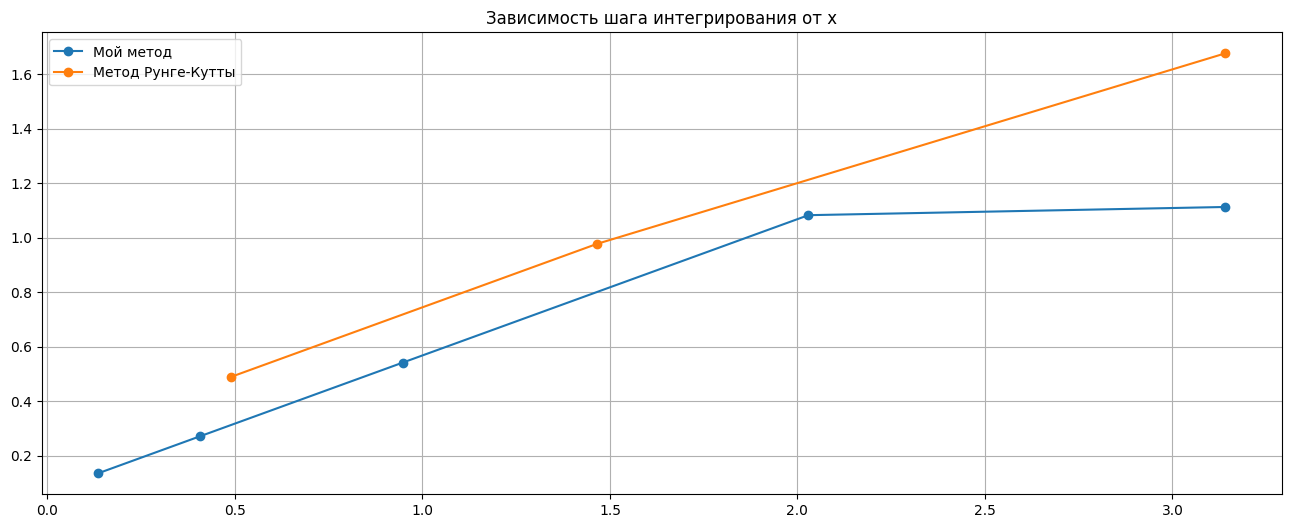

In [9]:
plt.figure(figsize=(16, 6))
plt.title('Зависимость шага интегрирования от x')


mysteps = call(diffur, x1, y0, x2, method = 'rk2',stepsetting='adaptive', eps=10 ** -4)[2]
rk4steps = call(diffur, x1, y0, x2, method = 'rk4',stepsetting='adaptive', eps=10 ** -4)[2]

plt.plot(x1 + np.cumsum(mysteps), mysteps, marker='o', label='Мой метод')
plt.plot(x1 + np.cumsum(rk4steps), rk4steps, marker='o', label='Метод Рунге-Кутты')

plt.grid()
plt.legend();

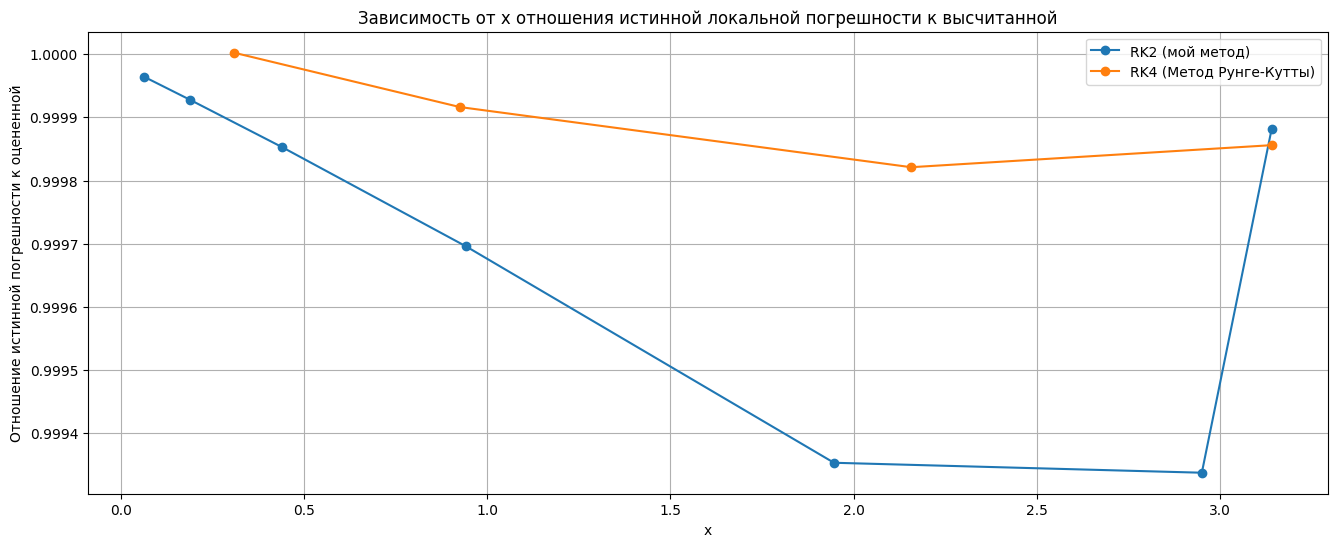

In [15]:
plt.figure(figsize=(16, 6))
plt.title('Зависимость от x отношения истинной локальной погрешности к высчитанной')

# Погрешность метода RK2 (ваш вариант)
mv_result = call(diffur, x1, y0, x2, method='rk2', stepsetting='adaptive', eps=10**-5)
mv_vals, mv_loc_err, mv_steps, _ = mv_result

# Создаем массив значений y для всех шагов
mv_args = np.append([x1], x1 + np.cumsum(mv_steps))

# В mv_vals хранятся только конечные значения на каждом шаге, нужно собрать все значения
mv_all_vals = [y0]  # Начинаем с начального условия
current_y = y0.copy()
for i, step in enumerate(mv_steps):
    # Вычисляем решение на каждом шаге
    current_y = call(diffur, mv_args[i], current_y, mv_args[i+1], step=step, method='rk2', stepsetting='none')[0]
    mv_all_vals.append(current_y)

mv_all_vals = np.array(mv_all_vals)

real_mv_loc_err = np.array([norm(real_y(mv_args[i], mv_all_vals[i], mv_args[i + 1]) - mv_all_vals[i + 1])  
                          for i in range(len(mv_args) - 1)])
mv_ratio = real_mv_loc_err / mv_loc_err

# Погрешность метода RK4
rk_result = call(diffur, x1, y0, x2, method='rk4', stepsetting='adaptive', eps=10**-5)
rk_vals, rk_loc_err, rk_steps, _ = rk_result

rk_args = np.append([x1], x1 + np.cumsum(rk_steps))

# Аналогично для RK4
rk_all_vals = [y0]
current_y = y0.copy()
for i, step in enumerate(rk_steps):
    current_y = call(diffur, rk_args[i], current_y, rk_args[i+1], step=step, method='rk4', stepsetting='none')[0]
    rk_all_vals.append(current_y)

rk_all_vals = np.array(rk_all_vals)

real_rk_loc_err = np.array([norm(real_y(rk_args[i], rk_all_vals[i], rk_args[i + 1]) - rk_all_vals[i + 1])  
                          for i in range(len(rk_args) - 1)])
rk_ratio = real_rk_loc_err / rk_loc_err

# Построение графиков
plt.plot(mv_args[1:], mv_ratio, marker='o', label='RK2 (мой метод)')
plt.plot(rk_args[1:], rk_ratio, marker='o', label='RK4 (Метод Рунге-Кутты)')

plt.xlabel('x')
plt.ylabel('Отношение истинной погрешности к оцененной')
plt.grid()
plt.legend()
plt.show()

<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
C:\Users\79046\AppData\Local\Temp\ipykernel_27480\3628562807.py:12: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('Погрешность $\epsilon^x$')


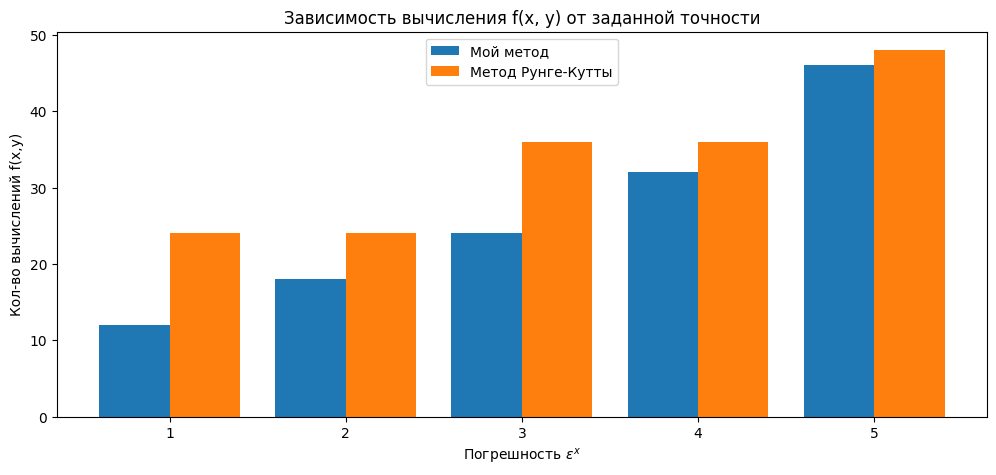

In [16]:
plt.figure(figsize=(12, 5))
plt.title('Зависимость вычисления f(x, y) от заданной точности')

eps_list = [10 ** -i for i in range(1, 6)]

mv_calc = [call(diffur, x1, y0, x2, method = 'rk2',stepsetting='adaptive', eps=eps_list[i])[3] for i in range(5)]
rk_calc = [call(diffur, x1, y0, x2, method = 'rk4',stepsetting='adaptive', eps=eps_list[i])[3] for i in range(5)]

plt.bar(-np.log10(eps_list) - 0.2, mv_calc, width=0.4, label='Мой метод')
plt.bar(-np.log10(eps_list) + 0.2, rk_calc, width=0.4, label='Метод Рунге-Кутты')

plt.xlabel('Погрешность $\epsilon^x$')
plt.ylabel('Кол-во вычислений f(x,y)')
plt.legend(loc='upper center');